In [1]:
library(tidyverse)
library(here)
library(tikzDevice)

options(repr.plot.width = 16, repr.plot.height = 8)

theme_set(theme_minimal())
df_mse <- read_csv(here("data/figures/03_state_space_models/compare_ce_eis_mse.csv"))
df_ef <- read_csv(here("data/figures/03_state_space_models/ef_large_N.csv"))
df_dimensions <- read_csv(here("data/figures/03_state_space_models/ef_dimensions.csv"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /home/sheyder/workspace/work/phd/thesis

Rows: 3000 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): method
dbl (7): N, N_mse, mean_bias, mean_var, var_bias, var_var, ef


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 6 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): method
dbl (2): N, ef


ℹ Use `spec()` t

png 
  2

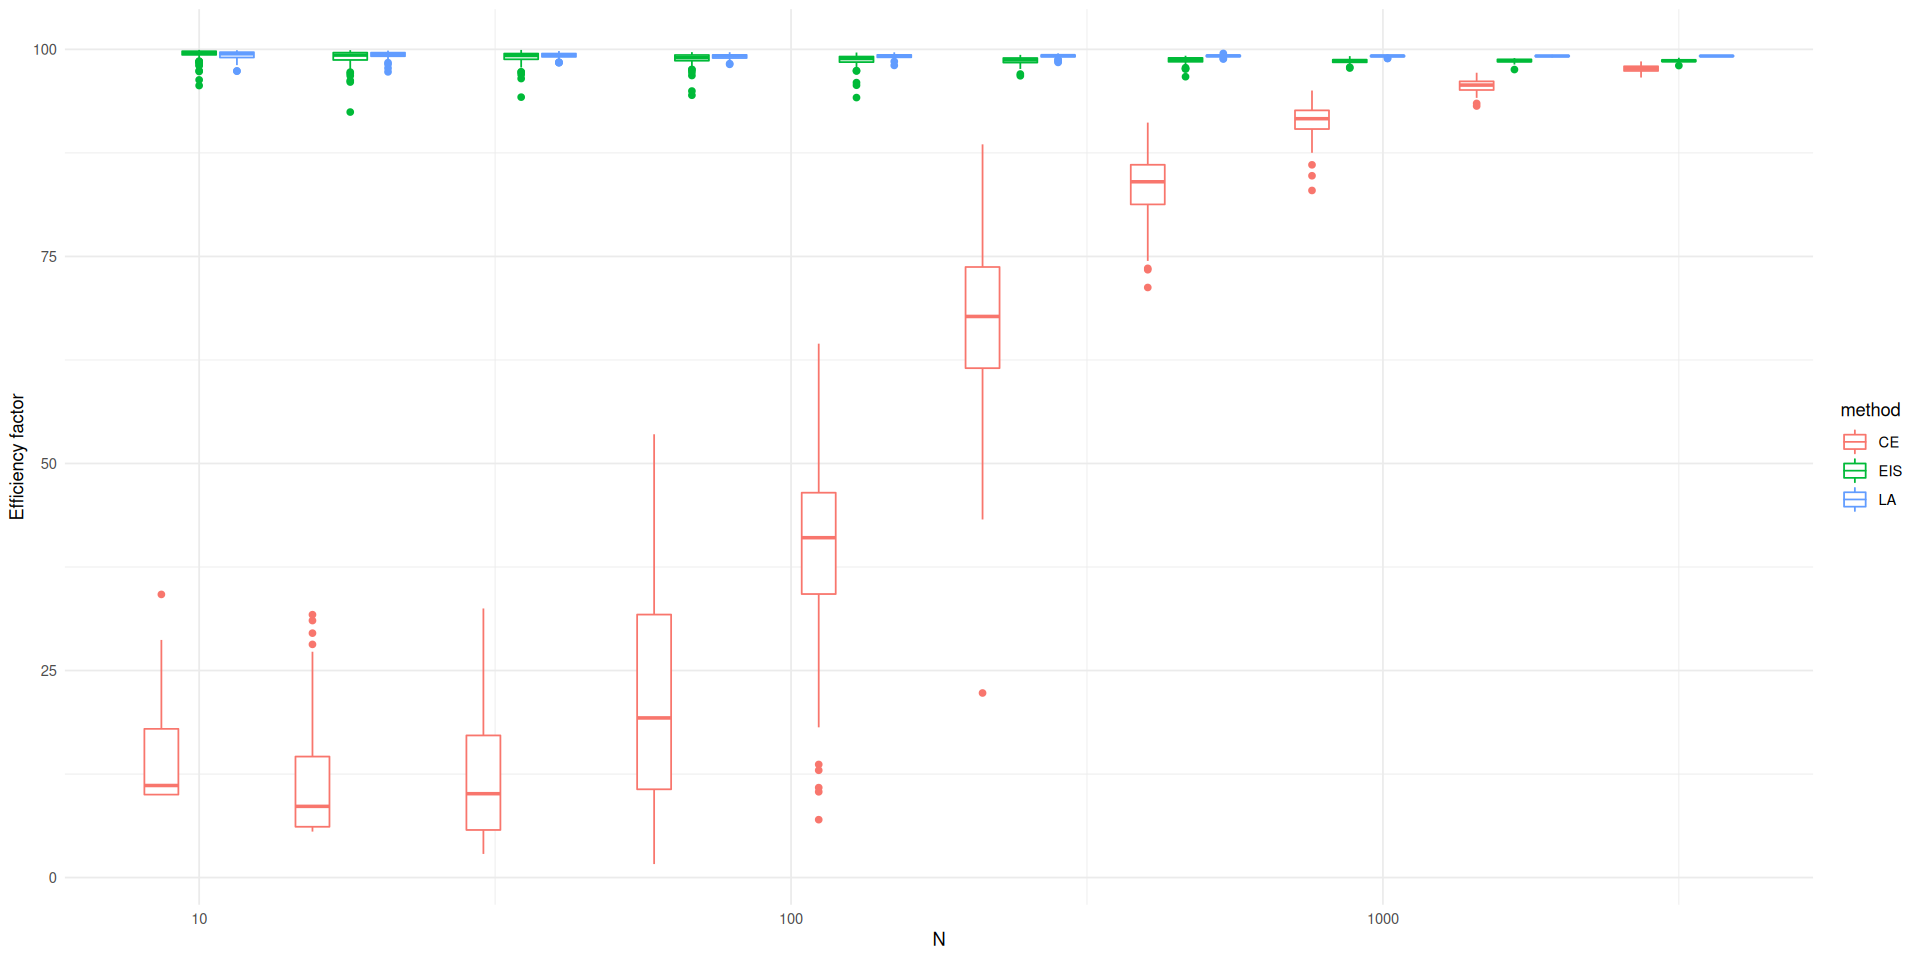

In [2]:
tikz(file = here("tikz/ef_comparison_medium_N.tex"), width= 16, height=9)
plt <- df_mse %>%
    ggplot(aes(N, ef, group = interaction(N, method))) +
    geom_boxplot(aes(color = method)) +
    scale_x_log10() +
    labs(x="N", y="Efficiency factor")
plt
dev.off()
plt

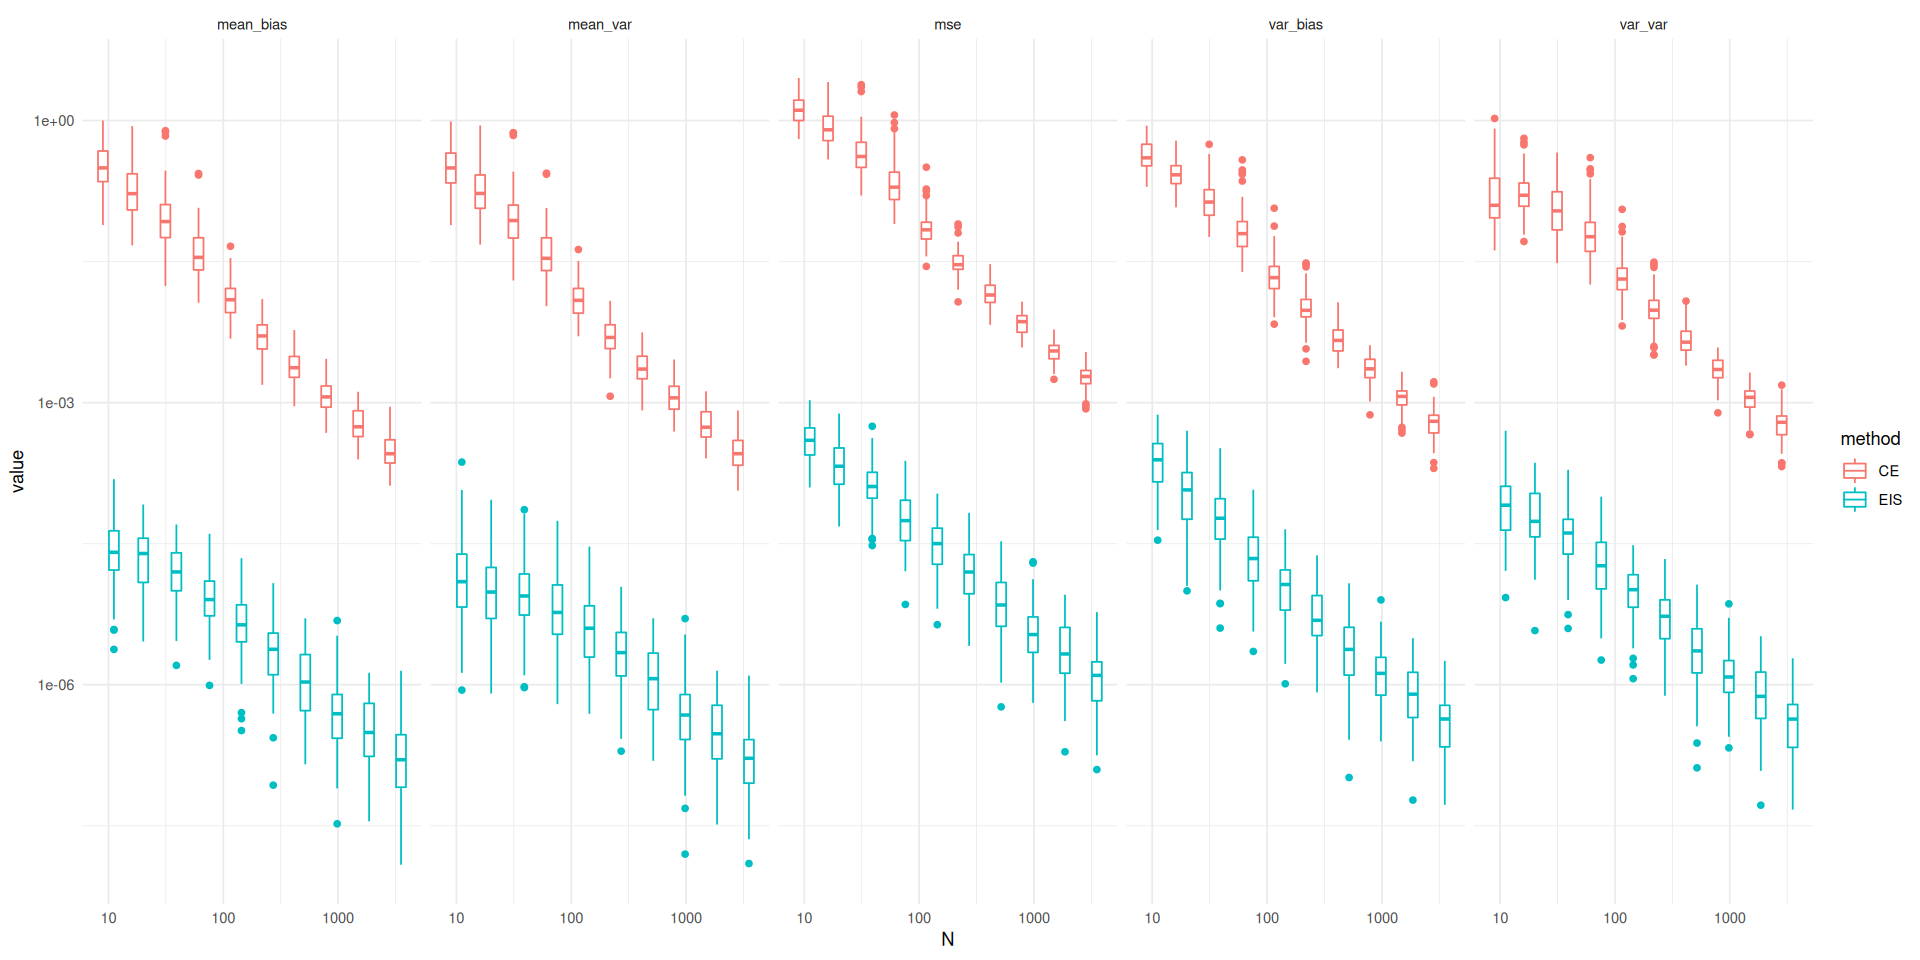

In [3]:
df_mse %>%
    filter(method != "LA") %>%
    mutate(mse = mean_bias + mean_var + var_bias + var_var) %>%
    select(method, N, mean_bias:var_var, mse) %>%
    pivot_longer(-c(method, N)) %>%
    ggplot(aes(N, value)) +
    geom_boxplot(aes(color=method, group=interaction(N, method))) +
    scale_y_log10() +
    scale_x_log10() +
    facet_wrap(~name, nrow = 1)

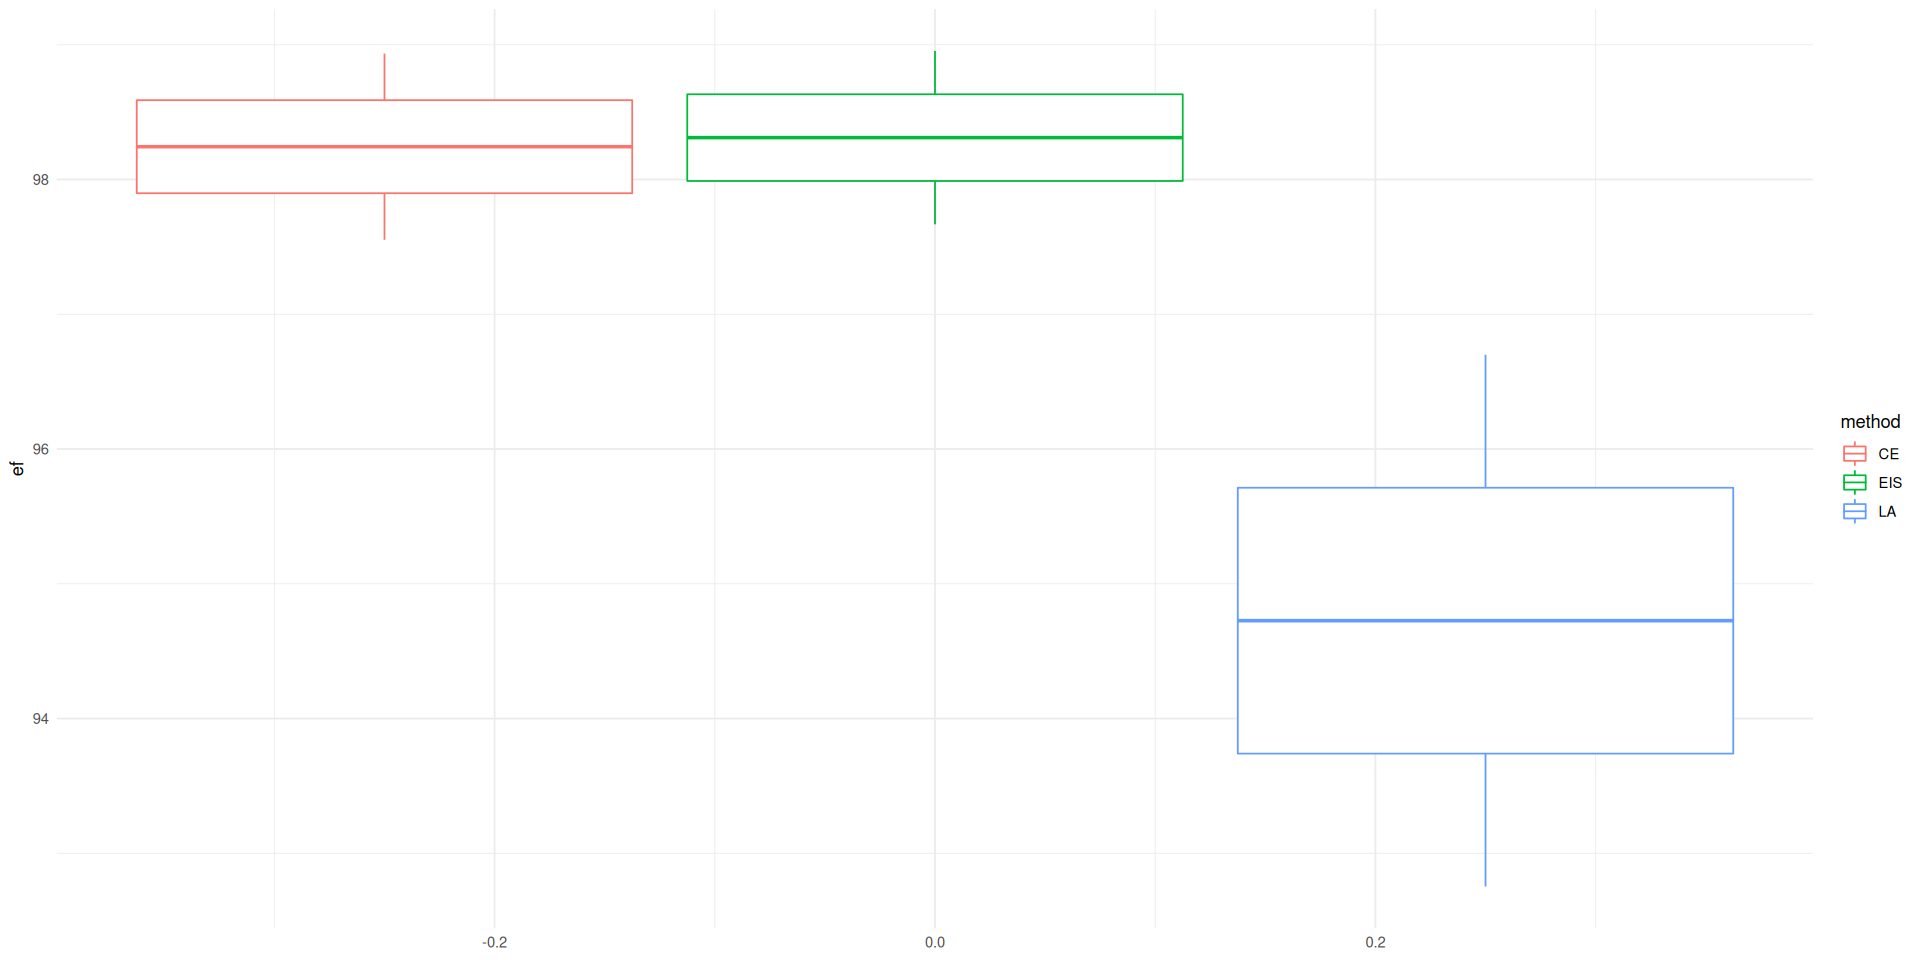

In [4]:
df_ef %>%
    ggplot(aes(y=ef, color=method)) +
    geom_boxplot() 

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”


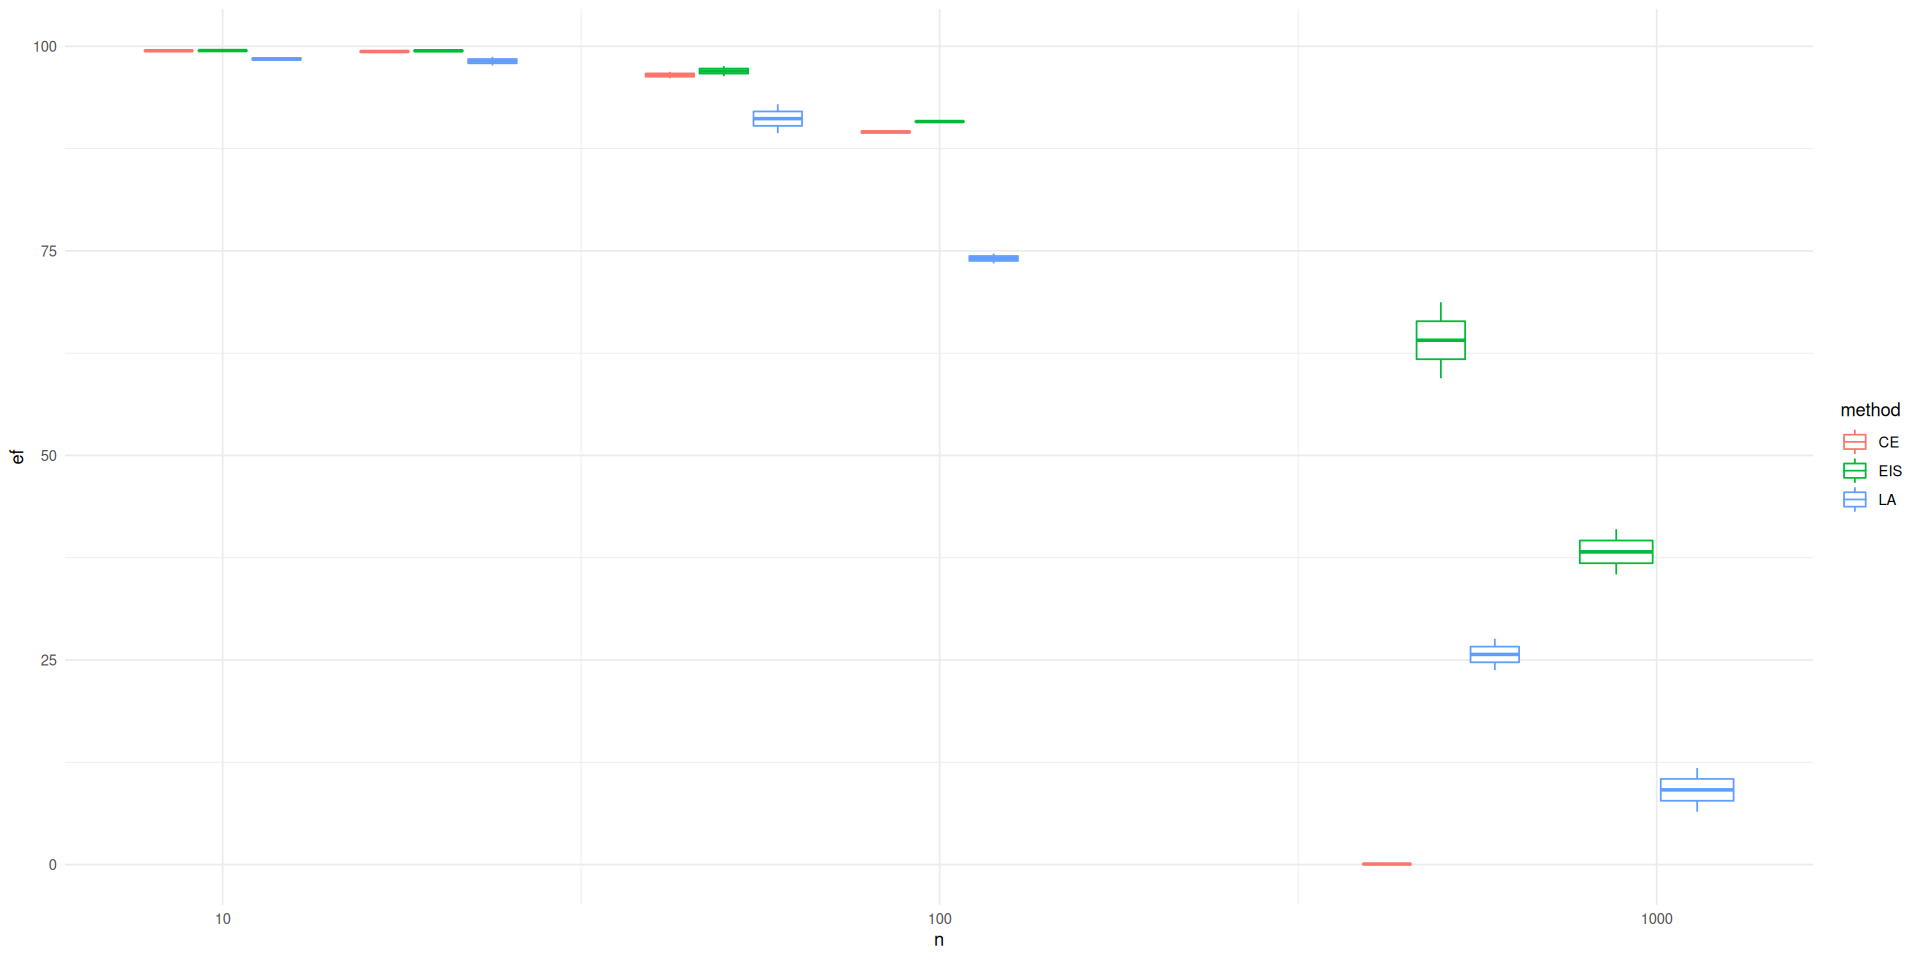

In [5]:
df_dimensions %>%
    ggplot(aes(x=n, y=ef, color=method)) +
    geom_boxplot(aes(group = interaction(n, method))) +
    scale_x_log10()